Step: Not converge in 1000 epochs.
Bipolar Step: Not converge in 1000 epochs.
Sigmoid: Not converge in 1000 epochs.
ReLU: Not converge in 1000 epochs.


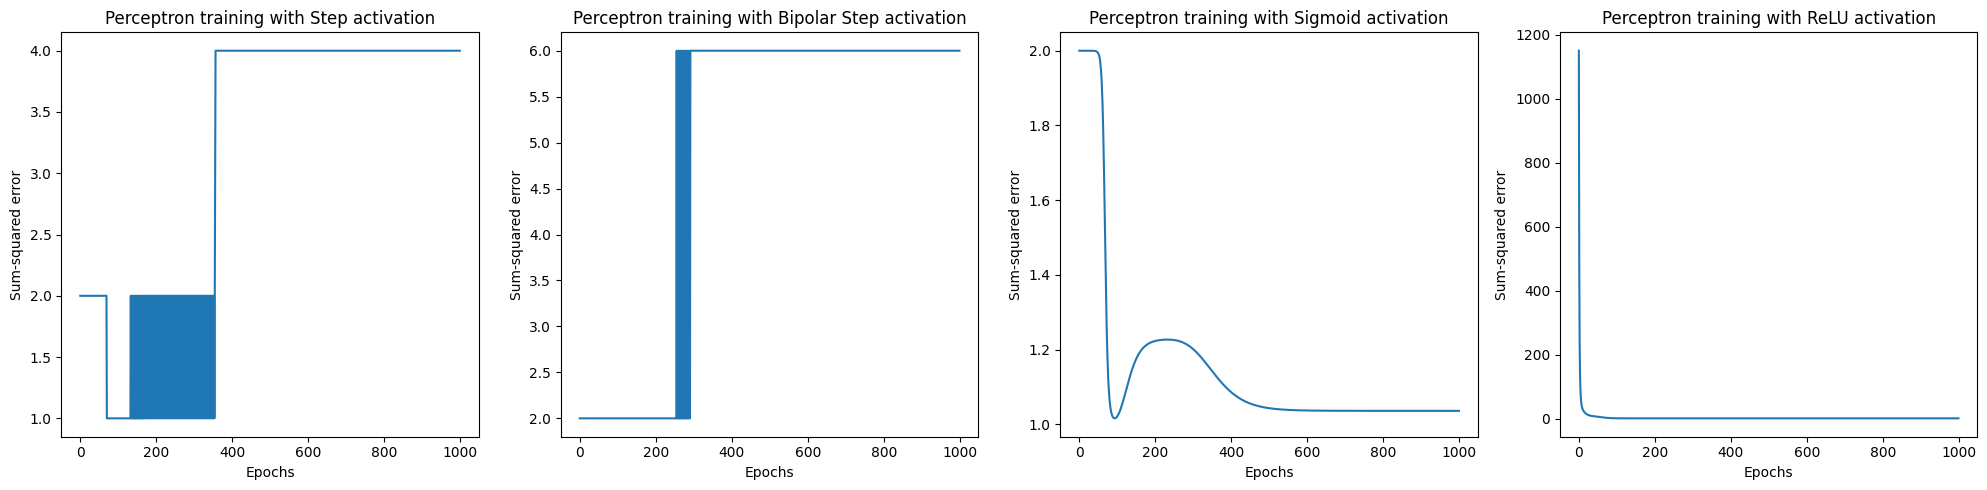

In [2]:
#A4 (ii)
import numpy as np
import matplotlib.pyplot as plt
# Initialize weights, learning rate, and XOR gate truth table
initial_weights = np.array([20, 0.5, -0.85])
learning_rate = 0.07
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_targets = np.array([0, 1, 1, 0])

# Activation functions
def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return -1 if x < 0 else 1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Generic perceptron training function
def perceptron(activation_func):
    weights = initial_weights.copy()
    epochs, errors = [], []
    max_epochs, converged = 1000, False

    for epoch in range(max_epochs):
        error_sum = 0
        for i, input_data in enumerate(training_inputs):
            weighted_sum = np.dot(input_data, weights[1:]) + weights[0]
            prediction = activation_func(weighted_sum)
            error = training_targets[i] - prediction
            weights[1:] += learning_rate * error * input_data
            weights[0] += learning_rate * error
            error_sum += error ** 2

        epochs.append(epoch)
        errors.append(error_sum)
        if error_sum == 0:
            converged = True
            break

    return converged, epoch + 1, epochs, errors

# Activation functions to experiment with
activation_functions = [
    ("Step", step_function),
    ("Bipolar Step", bipolar_step_function),
    ("Sigmoid", sigmoid_function),
    ("ReLU", relu_function)
]

# Create subplots for four graphs
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Run perceptron for each activation function and plot results in separate subplots
for ax, (activation_name, activation_func) in zip(axs, activation_functions):
    converged, iterations, epochs, errors = perceptron(activation_func)

    # Plot the epochs against the error values
    ax.plot(epochs, errors)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Sum-squared error')
    ax.set_title(f'Perceptron training with {activation_name} activation')

    # Output the results
    status = "Converged" if converged else "Not converge"
    print(f"{activation_name}: {status} in {iterations} epochs.")

# Show all activation functions' results in separate graphs
plt.tight_layout()
plt.show()
